In [65]:
# tensorflow.keras.etc is for TF 1.14
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [67]:
df = pd.read_excel('C:/Users\Raul\Documents\TFM\model_AI\\train.xls')

In [69]:
# dropping rows that have urls as text and date, real's dates look fine, also dropping ones that have no text
df = df.drop(df.loc[df.Text == ' '].index)

In [71]:
# Give labels to data before combining
df = df.fillna(' ')
df.loc[df['Category'] == 'True','Category'] = 0
df.loc[df['Category'] == 'Fake','Category'] = 1

In [73]:
df

,Id,Category,Topic,Source,Headline,Text,Link
0,1,1,Education,El Ruinaversal,"RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...","RAE INCLUIRÁ LA PALABRA ""LADY"" EN EL DICCIONAR...",http://www.elruinaversal.com/2017/06/10/rae-in...
1,2,1,Education,Hay noticia,"La palabra ""haiga"", aceptada por la RAE","La palabra ""haiga"", aceptada por la RAE La Rea...",https://haynoticia.es/la-palabra-haiga-aceptad...
2,3,1,Education,El Ruinaversal,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,YORDI ROSADO ESCRIBIRÁ Y DISEÑARÁ LOS NUEVOS L...,http://www.elruinaversal.com/2018/05/06/yordi-...
3,4,0,Education,EL UNIVERSAL,UNAM capacitará a maestros para aprobar prueba...,UNAM capacitará a maestros para aprobar prueba...,http://www.eluniversal.com.mx/articulo/nacion/...
4,5,1,Education,Lamula,pretenden aprobar libros escolares con conteni...,Alerta: pretenden aprobar libros escolares con...,https://redaccion.lamula.pe/2018/06/19/memoria...
...,...,...,...,...,...,...,...
671,672,1,Entertainment,El Dizque,Madonna será la nueva imagen del Chocolate Abu...,Madonna será la nueva imagen del Chocolate Abu...,https://www.eldizque.com/madonna-sera-la-nueva...
672,673,0,Entertainment,Radio Formula,"Filtran material íntimo de Zelina Vega, luchad...","Filtran material íntimo de Zelina Vega, luchad...",http://www.radioformula.com.mx/notas.asp?Idn=7...
673,674,1,Entertainment,La Voz Popular,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...,CBS PLANEA GRAN HERMANO EN LA CASA BLANCA CON ...,http://lavozpopular.com/cbs-planea-gran-herman...
674,675,1,Entertainment,El Dizque,TV Azteca anuncia que cambiará su nombre por u...,TV Azteca anuncia que cambiará su nombre por u...,https://www.eldizque.com/tv-azteca-anuncia-que...


In [75]:
## train/test split the text data and labels
features = df['Text']
labels = df['Category']
X_train, X_test, y_train, y_test = train_test_split(features, labels, random_state = 42)

In [77]:
## not removing stop words to maintain word context
max_words = 2000
max_len = 400

token = Tokenizer(num_words=max_words, lower=True, split=' ')
token.fit_on_texts(X_train.values)
sequences = token.texts_to_sequences(X_train.values)
train_sequences_padded = pad_sequences(sequences, maxlen=max_len)

In [79]:
embed_dim = 50
lstm_out = 64
batch_size = 32

model = Sequential()
model.add(Embedding(max_words, embed_dim, input_length = max_len))
model.add(LSTM(lstm_out))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1, name='out_layer'))
model.add(Activation('sigmoid'))
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

KeyboardInterrupt: 

In [ ]:
train_sequences_padded = np.asarray(train_sequences_padded).astype('float32')
y_train = np.asarray(y_train.tolist()).astype('float32')

In [52]:
history = model.fit(train_sequences_padded, y_train, batch_size=batch_size, epochs=5, validation_split=0.2)

Train on 405 samples, validate on 102 samples
Epoch 1/5
405/405 [==============================] - 6s 16ms/sample - loss: 0.6922 - accuracy: 0.5185 - val_loss: 0.6973 - val_accuracy: 0.4314
Epoch 2/5
405/405 [==============================] - 3s 8ms/sample - loss: 0.6825 - accuracy: 0.5284 - val_loss: 0.6953 - val_accuracy: 0.4608
Epoch 3/5
405/405 [==============================] - 3s 8ms/sample - loss: 0.6372 - accuracy: 0.7037 - val_loss: 0.6764 - val_accuracy: 0.5882
Epoch 4/5
405/405 [==============================] - 3s 8ms/sample - loss: 0.6107 - accuracy: 0.7704 - val_loss: 0.6610 - val_accuracy: 0.5980
Epoch 5/5
405/405 [==============================] - 3s 8ms/sample - loss: 0.4681 - accuracy: 0.8716 - val_loss: 0.6558 - val_accuracy: 0.6176


## EVALUACION

In [53]:
# now compare to test values
test_sequences = token.texts_to_sequences(X_test)
test_sequences_padded = pad_sequences(test_sequences, maxlen=max_len)

In [54]:
test_sequences_padded = np.asarray(test_sequences_padded).astype('float32')
y_test = np.asarray(y_test.tolist()).astype('float32')

In [55]:
model.evaluate(test_sequences_padded, y_test)

169/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.6289233078618022, 0.6213018]

## GRAFICAS

([<matplotlib.axis.XTick at 0x27f551d2708>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

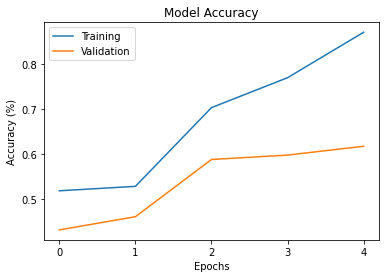

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Training', 'Validation'])
plt.ylabel('Accuracy (%)')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])

([<matplotlib.axis.XTick at 0x27f58530288>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

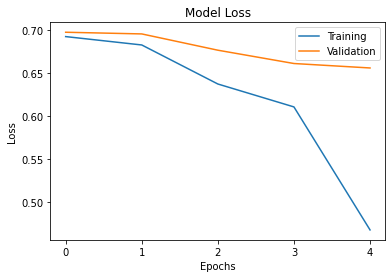

In [57]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Training', 'Validation'])
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.xticks([0,1,2,3,4])

## PRUEBAS DEL MODELO

In [58]:
# can it generalize?
fake = ["""Se descubre que Sigmund Freud inventó el psicoanálisis como un método para ligar
El hallazgo de una serie de cartas de llamado padre del psicoanálisis, Sigmund Freud, ha sacado a la luz un detalle que podría cambiar para siempre no sólo la visión que se tenía de su trabajo, sino del futuro de esta disciplina.
De acuerdo a lo que el mismo sabio especificó en sus escritos, él no creía en el psicoanálisis, sino que sólo lo usaba como estrategia para ligar.
El profesor Solsticio Schoppenhaggen, reconocido historiador y biógrafo de Freud, fue quien comunicó al mundo sus descubrimientos: "De acuerdo a la correspondencia que encontramos, Sigmund se carteaba con uno de sus amigos, diciéndole lo terriblemente difícil que era para él conseguir sexo, pues aseguraba que todas las mujeres que conocía eran muy mojigatas y reprimidas".
Tras de unos dos meses de quejarse continuamente en cada epístola, su ánimo cambió notablemente. En su correspondencia, citaba que convenciendo a las damas que todo lo que pensaban y hacían en realidad estaba motivado por el sexo, era para él mucho más fácil llevárselas a la cama.
El mismo Freud acepta en sus escritos que ni él mismo se lo creía, pero que se vio obligado a escribir algunos libros para que no comenzaran a rumorar que todo era un truco.
"En muchas de las cartas, dirigidas a su amigo, que sólo conocemos como Erich F., le aconsejaba que comenzara a usar la técnica también, que le sería muy útil. En ese sentido, su amigo no parecía muy de acuerdo, pues él sostenía que el amar debería ser un arte, y su aspiración, más que el ligue, era dominar el arte de amar".
El historiador nos prometió que en cuanto hubiera nuevos descubrimientos, nos lo haría saber de inmediato."""]

In [59]:
seq = token.texts_to_sequences(fake)
padded = pad_sequences(seq, maxlen=max_len)
fake_news_pred = model.predict(padded)

In [60]:
fake_news_pred

array([[0.7719887]], dtype=float32)

In [61]:
real = ["""

Actualizan lineamientos para abortar en la CdMx La Secretaría de Salud capitalina adicionó conceptos y reordenó los tipos de interrupción de embarazo en la capital, para establecer las normas de operación de autoridades y personal.
El aborto podrá realizarlo el Sistema de Salud capitalino hasta la décima segunda semana de gestación.
Ciudad de México / *NUMBER*.2018 *NUMBER*:*NUMBER*:*NUMBER*
La Secretaría de Salud de la Ciudad de México actualizó los lineamientos generales de organización y operación de los servicios de salud para la interrupción del embarazo en la capital.
En una publicación de la Gaceta Oficial, se adicionan conceptos y reordenan los tipos de interrupción del embarazo y aborto, con base en la evidencia científica, experiencia de la práctica cotidiana y de las modificaciones de la normativa, que serán vigentes a partir de mañana.
Explicó que ello permitirá contar con un ordenamiento acorde a la práctica clínica del personal en salud y mecanismos normativos actualizados que logren una atención eficiente, eficaz con calidad y calidez para las mujeres que soliciten la interrupción del embarazo.
Destacó que el objetivo es establecer las normas de operación para la interrupción del embarazo en la capital, que realizarán las autoridades y personal del Sistema de Salud local, para garantizar que los servicios de atención médica a mujeres sean eficaces, oportunos con calidad y calidez. La interrupción legal del embarazo podrá ser realizada por el Sistema de Salud capitalino hasta la décimo segunda semana completa de gestación, previa solicitud de la usuaria y dictámenes de salud de la mujer embarazada y médico de edad gestacional. En el caso de una paciente menor de edad, mayor de *NUMBER* años, indicó que podrá presentarse acompañada de su padre, madre y/o tutor, o solicitar el apoyo del personal de la Procuraduría de la Defensa de los Derechos de Niñas, Niños y Adolescentes. En caso de violación, expuso que la interrupción voluntaria del embarazo se podrá realizar hasta la vigésima semana completa de gestación, sin que la usuaria lo haya denunciado ante las autoridades competentes, conforme la norma oficial mexicana en materias de violencia familiar, sexual y contra las mujeres. Sin embargo, el personal de Salud deberá informar a la usuaria sobre su derecho a denunciar los hechos de violencia sexual, así como de las instancias y de los centros de apoyo disponibles y los servicios integrales de atención, protección y defensa. La dependencia capitalina detalló que la interrupción del embarazo como consecuencia de alguna excluyente de responsabilidad penal del delito de aborto podrá ser por violación denunciada ante autoridad competente o por inseminación artificial no consentida. Asimismo, por encontrarse en riesgo la vida de la mujer o porque el producto de la gestación tiene alteraciones genéticas o congénitas que lo dañen física o mentalmente, incluso arriesgar la sobrevivencia del mismo, siempre tenga consentimiento de la mujer embarazada. Los procedimientos para realizar la interrupción del embarazo serán preferentemente a través del suministro de medicamentos o quirúrgicos (aspiraciones Manual Endouterina o Eléctrica Endouterina) o cualquier otro procedimiento médico quirúrgico, resaltó. En cuanto a los profesionales que realicen el procedimiento de interrupción del embarazo, apuntó que deberán contar con documento oficial que lo acredite como médico general, cirujano o gineco-obstétra, además de contar con capacitación teórico práctica y actualización.

"""]

In [62]:
seq = token.texts_to_sequences(real)
padded = pad_sequences(seq, maxlen=max_len)
no_fake_news_pred = model.predict(padded)

In [63]:
no_fake_news_pred

array([[0.16893479]], dtype=float32)